# Example - 12 - Neptune Aerocapture - Part 2b: Monte Carlo Simulations

In this example, we will demonstrate the another published result for aerocapture at Neptune.

We reproduce the example Monte Carlo results from "Girija, Saikia, Longuski et al. Feasibility and Performance Analysis of Neptune Aerocapture Using Heritage Blunt-Body Aeroshells, Journal of Spacecraft and Rockets, June, 2020, In press. DOI: 10.2514/1.A34719. Refer Section VIII A: Results for **retrograde** entry with maximum range of FMINMAX.

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

In [2]:
# Create a planet object
planet=Planet("NEPTUNE")

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Neptune/neptune-gram-avg.dat', 0 , 7 , 6 , 5 , \
                            heightInKmFlag=True)

# Create a vehicle object
vehicle=Vehicle('Trident', 1000.0, 200.0, 0.40, 3.1416, 0.0, 1.00, planet)

# Set vehicle conditions at entry interface
# Note these conditions are for retrograde equatorial entry
# The EFPA selection process is described in Sec. VII in the reference article.
vehicle.setInitialState(1000.0, 0.0, 0.0, 33.00, 180.0,-11.43, 0.0, 0.0)
vehicle.setSolverParams(1E-6)

In [3]:
vehicle.setMaxRollRate(30.0)
vehicle.setEquilibriumGlideParams(75.0, 3.0, 18.9, 120.0, 101, -500.0)
vehicle.setTargetOrbitParams(4000.0, 400.0E3, 10.0E3)

In [4]:
atmfiles = ['../atmdata/Neptune/FMINMAX-10L.txt', 
            '../atmdata/Neptune/FMINMAX-08L.txt',
            '../atmdata/Neptune/FMINMAX-06L.txt',  
            '../atmdata/Neptune/FMINMAX-04L.txt',
            '../atmdata/Neptune/FMINMAX-02L.txt',
            '../atmdata/Neptune/FMINMAX+00L.txt',  
            '../atmdata/Neptune/FMINMAX+02L.txt',
            '../atmdata/Neptune/FMINMAX+04L.txt',
            '../atmdata/Neptune/FMINMAX+06L.txt',
            '../atmdata/Neptune/FMINMAX+08L.txt', 
            '../atmdata/Neptune/FMINMAX+10L.txt']

In [5]:
vehicle.setupMonteCarloSimulation(1086, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                  -11.43, 0.11, 0.40, 0.013, 0.5, 0.1, 2400.0) 

In [6]:
# N = 10 shown here, run for a few thousand to be realistic. This will take several hours.

vehicle.runMonteCarlo(100, '../data/girijaSaikia2020b/MCB1') 

BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 1, PROF: ../atmdata/Neptune/FMINMAX+06L.txt, SAMPLE #: 42, EFPA: -11.53, SIGMA: 1.86, LD: 0.41, APO : 210233.74
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 2, PROF: ../atmdata/Neptune/FMINMAX+00L.txt, SAMPLE #: 82, EFPA: -11.47, SIGMA: 0.65, LD: 0.42, APO : 404021.05
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 3, PROF: ../atmdata/Neptune/FMINMAX-08L.txt, SAMPLE #: 197, EFPA: -11.39, SIGMA: -0.66, LD: 0.39, APO : 389028.95
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 4, PROF: ../atmdata/Neptune/FMINMAX+06L.txt, SAMPLE #: 172, EFPA: -11.34, SIGMA: 0.10, LD: 0.40, APO : 374039.92
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 5, PROF: ../atmdata/Neptune/FMINMAX+08L.txt, SAMPLE #: 160, EFPA: -11.48, SIGMA: -0.25, LD: 0.41, APO : 294339.22
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 6, PROF: ../atmdata/Neptune/FMINMAX+04L.txt, SAMPLE #: 196, EFPA: -11.46, SIGMA: 0.90, LD: 0.40, APO : 404630.18
BATCH :../data/girijaSaikia2020b/MCBX, RUN #: 

In [7]:
peri  = np.loadtxt('../data/girijaSaikia2020b/MCB1/terminal_periapsis_arr.txt')
apoa  = np.loadtxt('../data/girijaSaikia2020b/MCB1/terminal_apoapsis_arr.txt')

peri_dv  = np.loadtxt('../data/girijaSaikia2020b/MCB1/periapsis_raise_DV_arr.txt')

del_index1 = np.where(apoa < 0)
del_index2 = np.where(apoa>800.0E3)

del_index = np.concatenate((del_index1, del_index2), axis=1)

print('Simulation statistics')
print('----------------------------------------------')
print("No. of cases escaped :"+str(len(del_index1[0])))
print("No. of cases with apo. alt > 800.0E3 km :"+str(len(del_index2[0])))


Simulation statistics
----------------------------------------------
No. of cases escaped :0
No. of cases with apo. alt > 800.0E3 km :0


In [8]:
peri_new = np.delete(peri, del_index)
apoa_new = np.delete(apoa, del_index)
peri_dv_new  = np.delete(peri_dv, del_index)


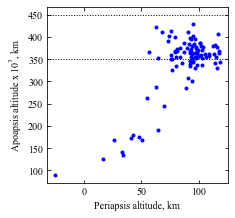

In [9]:
fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.plot(peri_new, apoa_new/1000.0, 'bo', markersize=3)

plt.xlabel('Periapsis altitude, km',fontsize=10)
plt.ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)

plt.axhline(y=350.0, linewidth=1, color='k', linestyle='dotted')
plt.axhline(y=450.0, linewidth=1, color='k', linestyle='dotted')



ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.savefig('../plots/girijaSaikia2020b-fig-13-N100.png',bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2020b-fig-13-N100.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2020b-fig-13-N100.eps', dpi=300,bbox_inches='tight')

This plot only has 100 trajectories. Below is a similar plot with 5000 trajectories

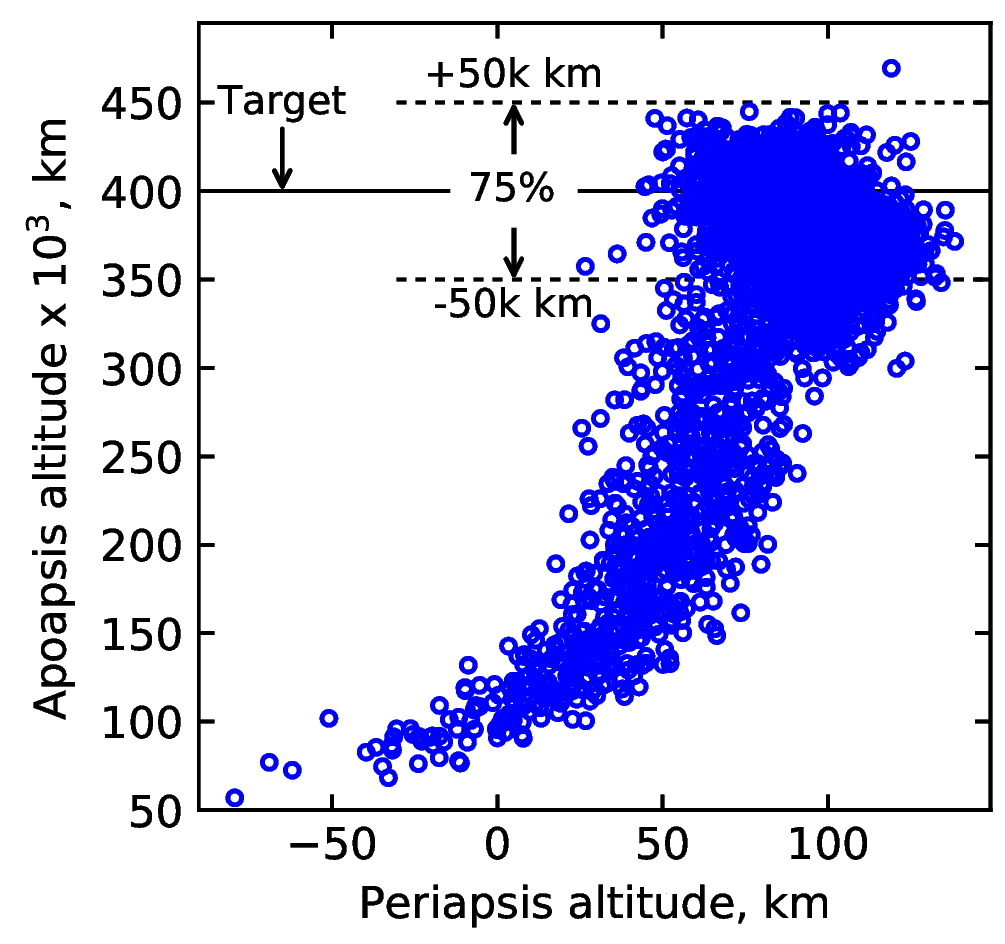

In [11]:
from IPython.display import Image
Image(filename='../plots/retrograde-higher-res.png', width=400)

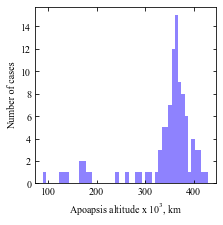

In [12]:
fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.hist(apoa_new/1000.0, bins=50, color='xkcd:periwinkle')
plt.xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)
plt.ylabel('Number of cases', fontsize=10)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.savefig('../plots/girijaSaikia2020b-apo-histogram-N100.png',bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2020b-apo-histogram-N100.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/girijaSaikia2020b-apo-histogram-N100.eps', dpi=300,bbox_inches='tight')

plt.show()

With more runs, the apoapsis histograms is as shown below.

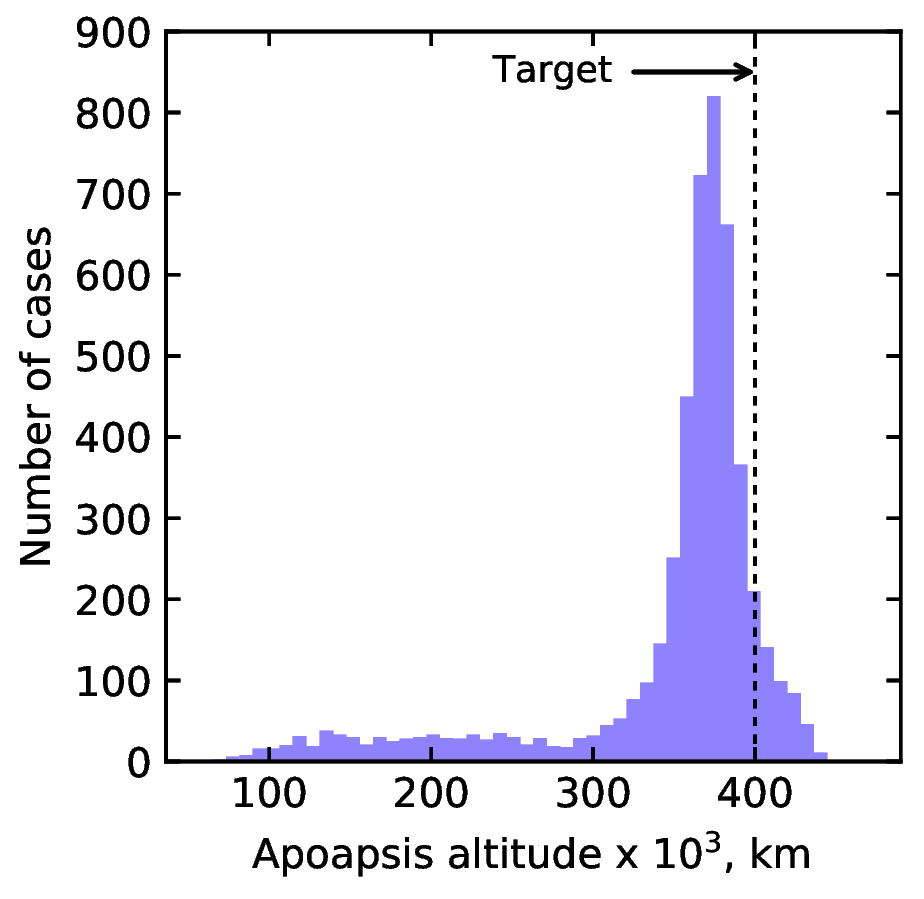

In [16]:
from IPython.display import Image
Image(filename='../plots/retrograde-apo-hist-higher-res.png', width=400)

**Congratulations!** You have now perfomed and post-processed the results from a Monte Carlo simulation for aerocapture at Neptune.